In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from datetime import datetime
from sklearn.dummy import DummyClassifier


today = datetime.today()
curr_year = today.year

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)

troca = {'yes':1,'no':0}
dados['sold'] = dados.sold.map(troca)
dados['age'] = curr_year - dados['model_year']
dados['km_per_year'] = round(dados['mileage_per_year']*1.60934,2) #Conv miles to km
dados = dados[['price','model_year','age','sold','km_per_year']]
dados.head()

,price,model_year,age,sold,km_per_year
0,30941.02,2000,22,1,35085.22
1,40557.96,1998,24,1,12622.05
2,89627.50,2006,16,0,11440.80
3,95276.14,2015,7,0,43167.33
4,117384.68,2014,8,1,12770.11


<AxesSubplot: xlabel='km_per_year', ylabel='price'>

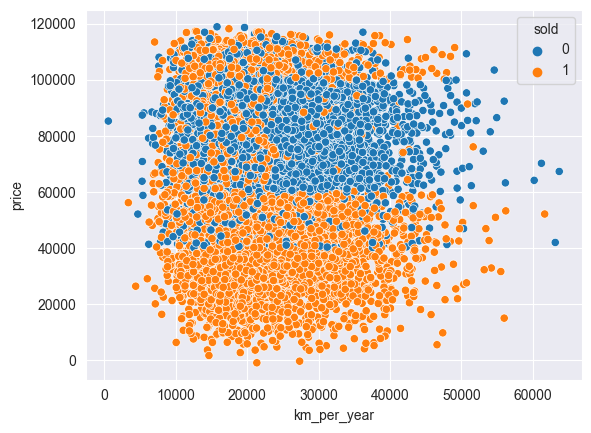

In [5]:
x = dados[['price','age','km_per_year']]
y = dados['sold']
ns.scatterplot(x='km_per_year',y='price',hue='sold',data=dados)

In [25]:
seed = 20
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

modelo = LinearSVC()
modelo.fit(X_train,y_train)
previsoes = modelo.predict(X_test)

print(f'Acurácia do modelo: {round(accuracy_score(y_test,previsoes),2)*100}%')



Acurácia do modelo: 56.99999999999999%


C:\Users\dmm\Documents\pythonBookProject\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [27]:
dummy = DummyClassifier()
dummy.fit(X_train,y_train)
previsoes = dummy.predict(X_test)
acuracia = dummy.score(X_test,y_test)*100
print(f'Acurácia de baseline: {round(acuracia,2)}%')

Acurácia de baseline: 58.0%


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

seed = 5
np.random.seed(seed)

raw_X_train, raw_X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

scaler =  StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(raw_X_train)
X_test = scaler.transform(raw_X_test)


modelo = SVC()
modelo.fit(X_train,y_train)
prev = modelo.predict(X_test)

print(f'Acurácia do modelo: {round(accuracy_score(y_test,prev),2)*100}%')


C:\Users\dmm\Documents\pythonBookProject\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\dmm\Documents\pythonBookProject\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Acurácia do modelo: 77.0%
